# Capstone Project: Air Pollution Prediction Based on Weather Factors

### Project Overview

This project investigates how air pollution levels vary across different regions and how weather conditions such as temperature and humidity affect these variations. Using the Air Quality and Pollution Assessment dataset from Kaggle, we perform a comprehensive analysis that includes data cleaning, correlation studies, clustering, dimensionality reduction, and machine learning modeling.

Key steps in this analysis include cleaning the dataset and handling missing values for accurate results, exploring relationships between weather factors and pollution indicators like PM10, PM2.5, NO2, SO2, and CO, and grouping regions by pollution severity using K-means and DBScan clustering techniques. We reduce data complexity using Principal Component Analysis (PCA), and classify air quality levels using multiple machine learning models including Support Vector Machines (SVM), Random Forest, and TabPFN. To address class imbalance, we applied SMOTE, which helped improve model performance, especially for minority classes. We also performed hyperparameter tuning to optimize model accuracy and generalization. Results were evaluated using precision, recall, F1-score, and accuracy, with Random Forest and TabPFN achieving near-perfect scores.

The ultimate goal is to uncover patterns and predictive relationships that can help environmental planners and policymakers make informed decisions to manage and mitigate air pollution based on weather and regional conditions.

### Business Recommendations

__1. Deploy Predictive Models for Air Quality Forecasting__
The Random Forest and TabPFN models achieved near-perfect accuracy (1.0), making them highly suitable for forecasting air quality levels in real time. City planners and environmental agencies can integrate these models into early warning systems to proactively alert the public during high-risk conditions.

__2. Improve Monitoring in High-Risk Areas__
The analysis shows that areas with high population density and close proximity to industrial zones are more likely to experience poor air quality. Resources such as mobile air monitoring units and emission controls should be focused on these locations.

__3. Use Weather Data to Trigger Preventive Actions__
Weather conditions like temperature and humidity were found to strongly influence pollution levels. Municipal authorities can use this relationship to issue public health advisories or implement temporary traffic restrictions on days with high pollution risk.

__4. Enhance Public Health Campaigns on High Pollution Days__
Predicting “Hazardous” air quality days is now more reliable, thanks to SMOTE and model tuning. Health departments can schedule targeted campaigns encouraging mask usage, reduced outdoor activity, or use of public transit during predicted spikes.

__5. Support Data-Driven Urban Planning__
The results can inform zoning and infrastructure decisions. For example, new industrial developments should be planned away from dense residential areas, using model insights to assess potential environmental impact in advance.

__6. Continue Model Evaluation to Ensure Robustness__
Despite high accuracy, especially from TabPFN, future use should include ongoing evaluation with updated datasets to ensure performance remains reliable and not overfitted to the current data sample.

### Getting Started

This notebook analyzes air pollution levels and their relationship with weather conditions using the [Air Quality and Pollution Assessment dataset](https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment) from Kaggle. To follow along or reproduce the analysis, you'll need to download the dataset and ensure all required Python libraries are installed.

### Step 1: Import Libraries

In [76]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.svm import SVC
# Install TabPFN (pip install tabpfn)
from tabpfn import TabPFNClassifier

### Step 2: Read in the Data

Use pandas to read in the dataset `updated_pollution_dataset.csv`. Print out basic information of the dataset.

Data has following Key Features:

**Temperature (°C)**: Average temperature of the region.  
**Humidity (%)**: Relative humidity recorded in the region.  
**PM2.5 Concentration (µg/m³)**: Fine particulate matter levels.  
**PM10 Concentration (µg/m³)**: Coarse particulate matter levels.  
**NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
**SO2 Concentration (ppb)**: Sulfur dioxide levels.  
**CO Concentration (ppm)**: Carbon monoxide levels.  
**Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
**Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Air Quality Levels**: Target Variable  
**- Good**: Clean air with low pollution levels.  
**- Moderate**: Acceptable air quality but with some pollutants present.  
**- Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
**- Hazardous**: Highly polluted air posing serious health risks to the population.  

In [77]:
df = pd.read_csv('data/updated_pollution_dataset.csv')

In [78]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [80]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [81]:
# Check for missing values and duplicates
print(df.isnull().sum())

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64
Number of duplicate rows: 0


### Step 3: Exploratory Data Analysis

#### Visualize distributions of numerical and categorical columns

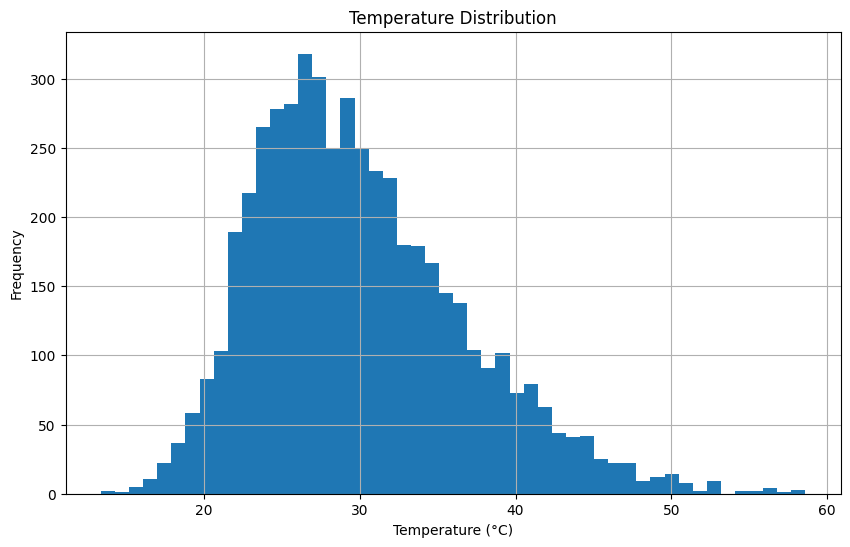

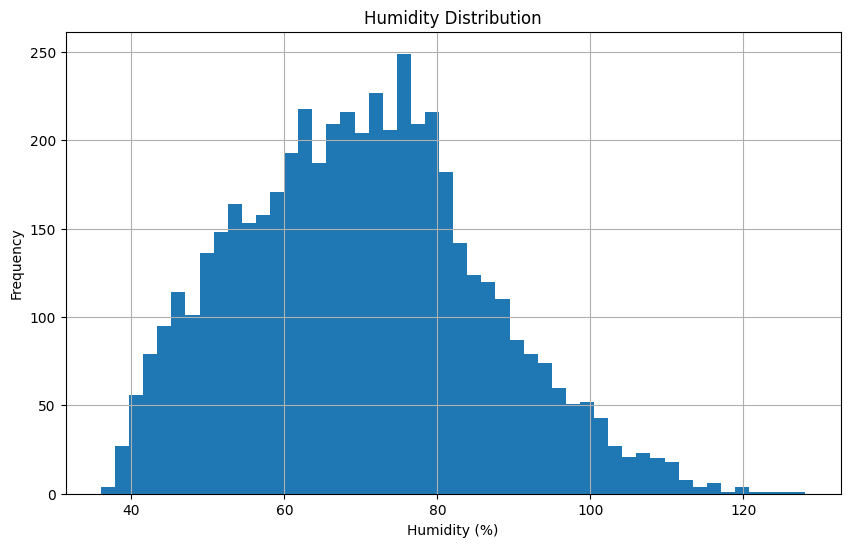

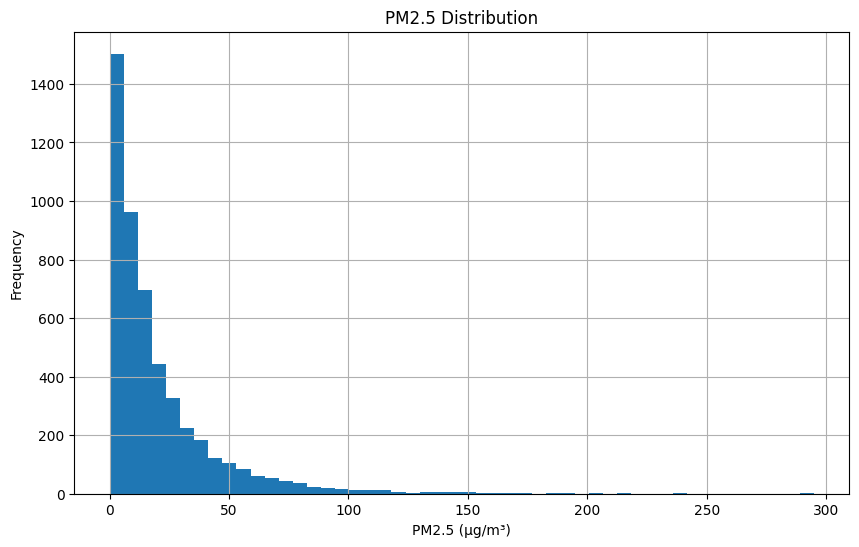

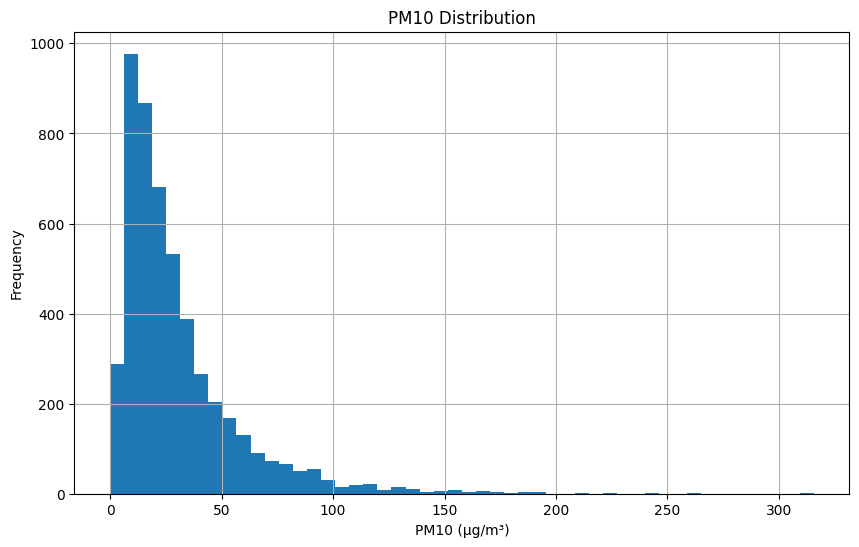

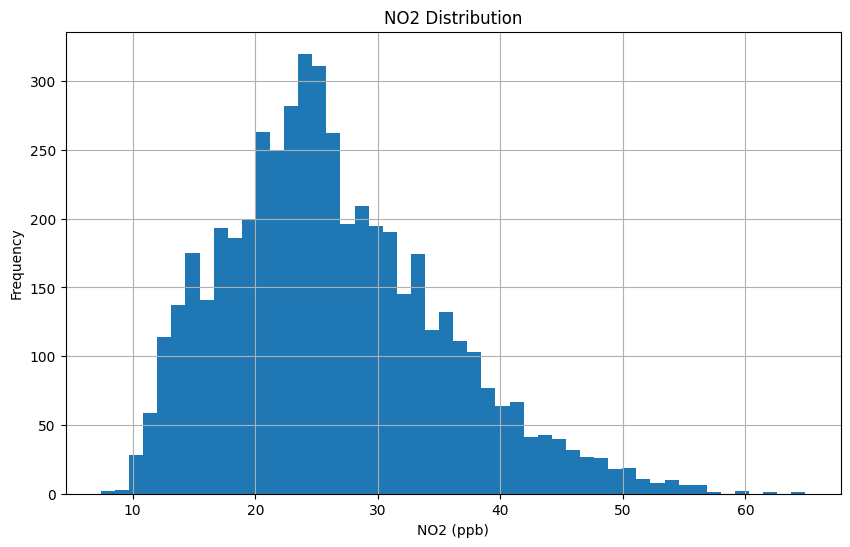

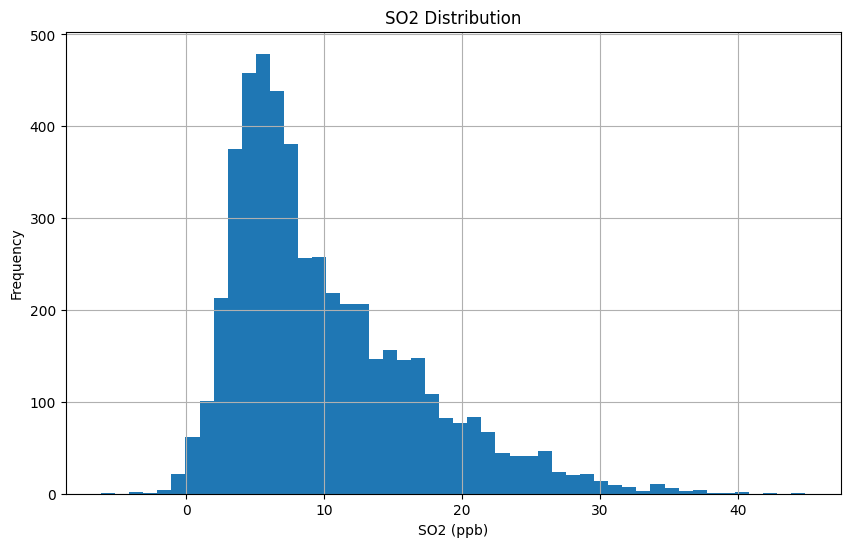

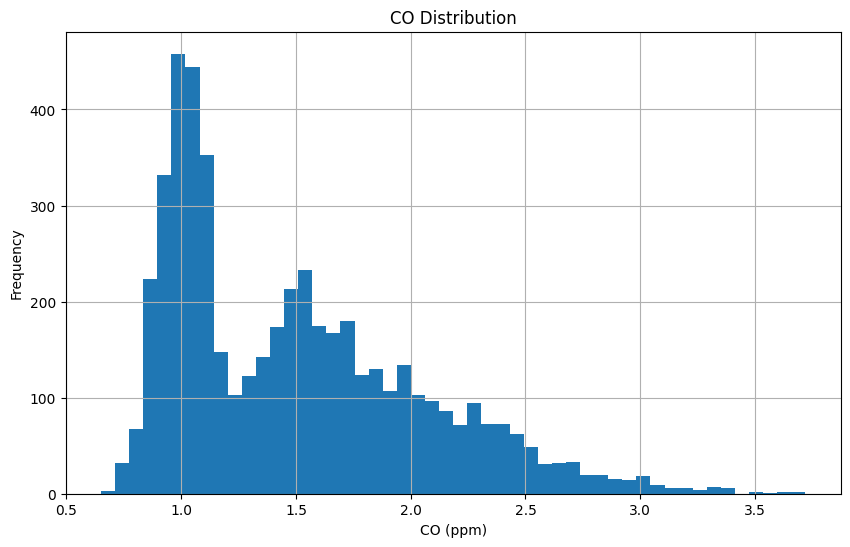

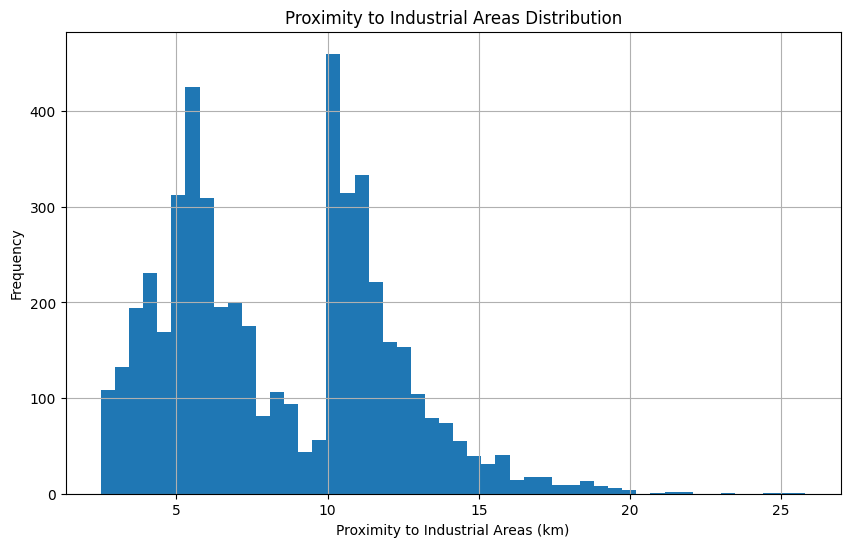

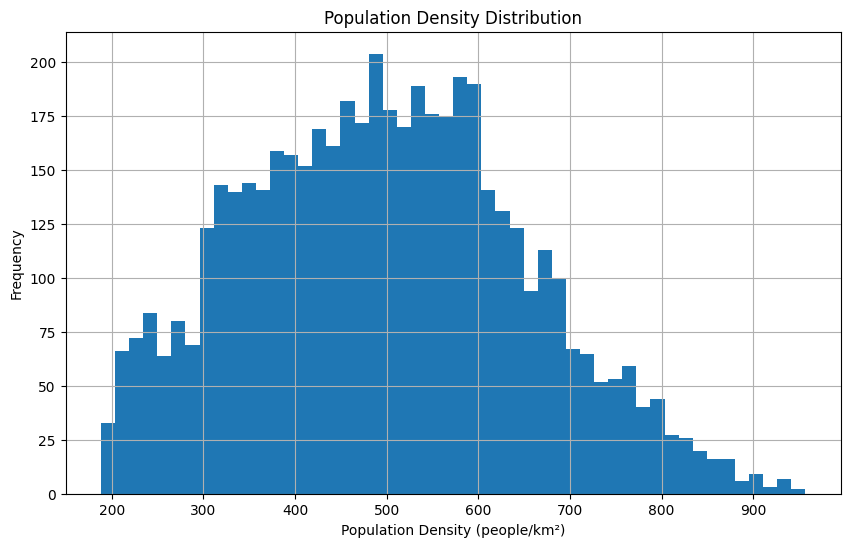

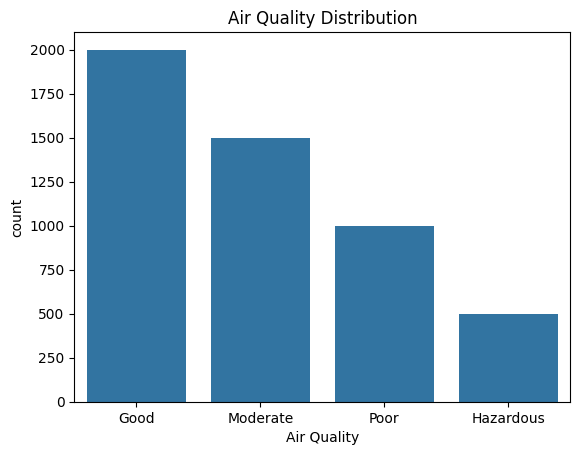

In [82]:
df['Temperature'].hist(bins=50, figsize=(10, 6))
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

df['Humidity'].hist(bins=50, figsize=(10, 6))
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()

df['PM2.5'].hist(bins=50, figsize=(10, 6))
plt.title('PM2.5 Distribution')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Frequency')
plt.show()

df['PM10'].hist(bins=50, figsize=(10, 6))
plt.title('PM10 Distribution')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('Frequency')
plt.show()

df['NO2'].hist(bins=50, figsize=(10, 6))
plt.title('NO2 Distribution')
plt.xlabel('NO2 (ppb)')
plt.ylabel('Frequency')
plt.show()

df['SO2'].hist(bins=50, figsize=(10, 6))
plt.title('SO2 Distribution')
plt.xlabel('SO2 (ppb)')
plt.ylabel('Frequency')
plt.show()

df['CO'].hist(bins=50, figsize=(10, 6))
plt.title('CO Distribution')
plt.xlabel('CO (ppm)')
plt.ylabel('Frequency')
plt.show()

df['Proximity_to_Industrial_Areas'].hist(bins=50, figsize=(10, 6))
plt.title('Proximity to Industrial Areas Distribution')
plt.xlabel('Proximity to Industrial Areas (km)')
plt.ylabel('Frequency')
plt.show()

df['Population_Density'].hist(bins=50, figsize=(10, 6))
plt.title('Population Density Distribution')
plt.xlabel('Population Density (people/km²)')
plt.ylabel('Frequency')
plt.show()

order = ['Good', 'Moderate', 'Poor', 'Hazardous']
sns.countplot(data=df, x='Air Quality', order=order)
plt.title('Air Quality Distribution')
plt.show()


#### Study correlation of the data

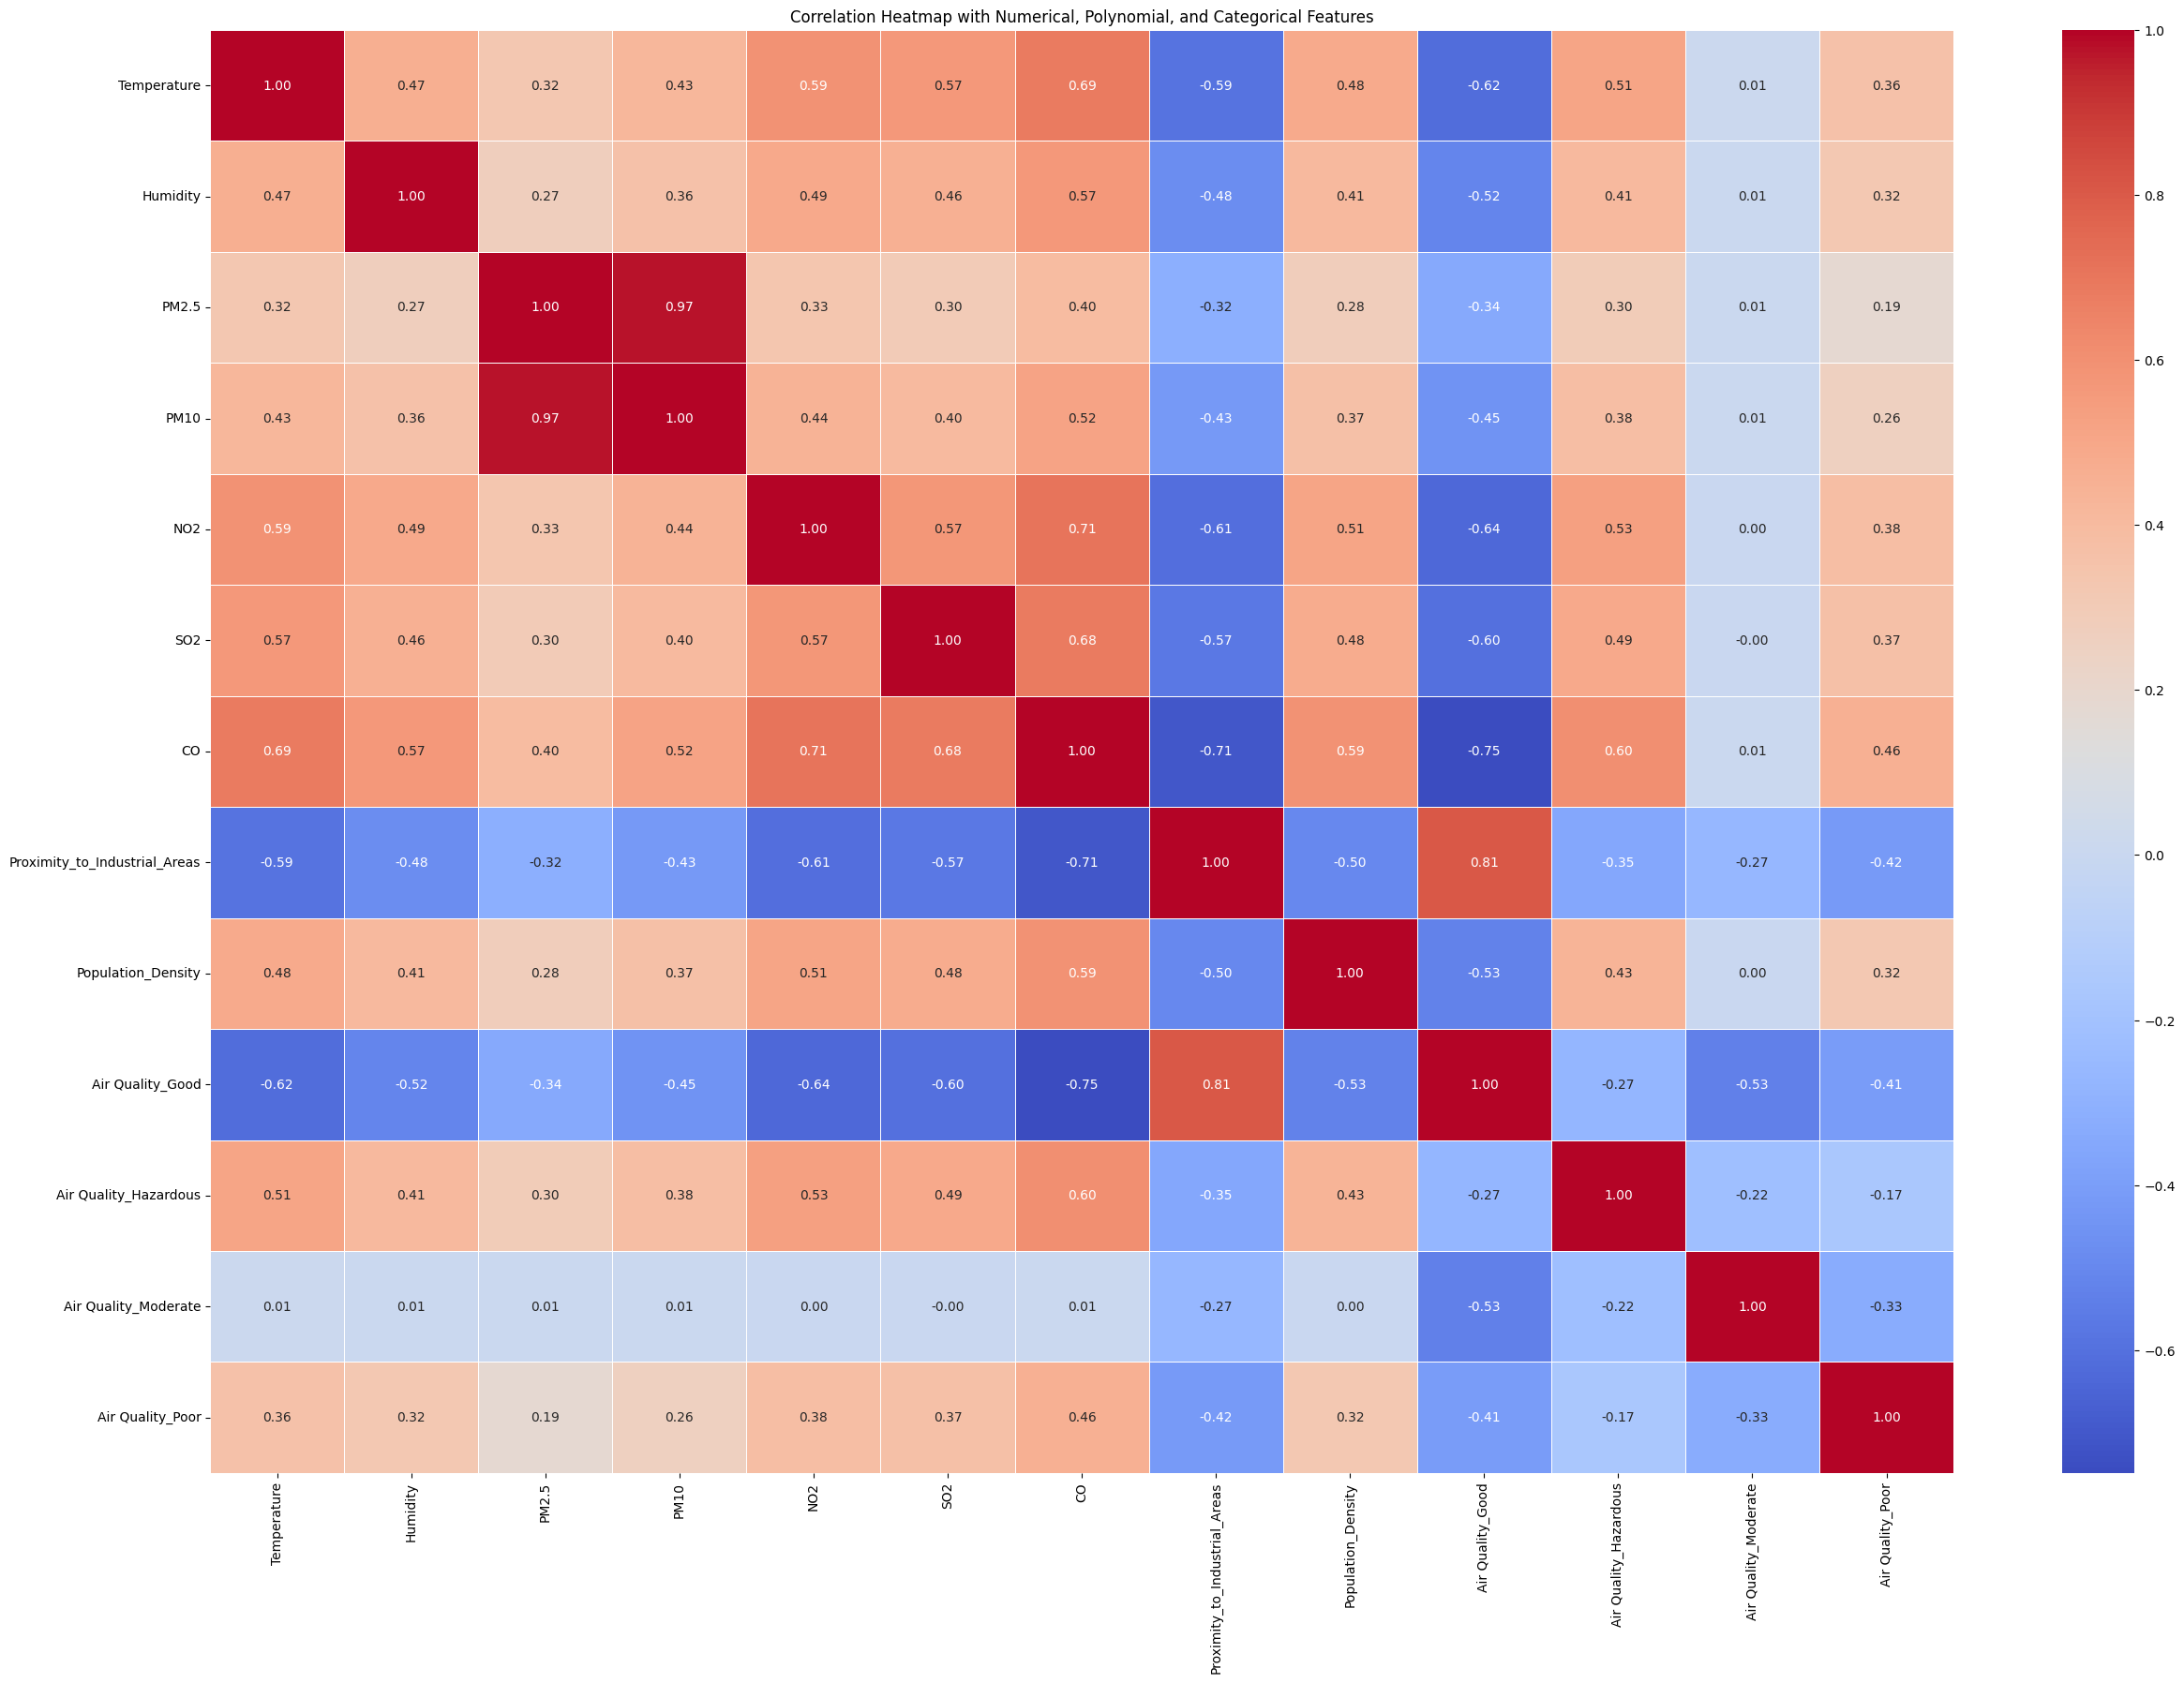

In [83]:
# Define categorical and numerical columns
categorical_cols = ['Air Quality']
numeric_cols = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']

# Apply Polynomial Features to numerical columns
poly = PolynomialFeatures(degree=1, include_bias=False)  # Create polynomial features (degree=2 for simplicity)

# Generate polynomial features for numeric columns
polynomial_features = poly.fit_transform(df[numeric_cols])

# Convert the polynomial features into a DataFrame
polynomial_df = pd.DataFrame(polynomial_features, columns=poly.get_feature_names_out(numeric_cols))

# One-Hot Encoding for categorical features (default is sparse=True)
encoder = OneHotEncoder(handle_unknown='ignore')

# Apply OneHotEncoder to the categorical columns
df_encoded = encoder.fit_transform(df[categorical_cols])

# Convert the encoded values to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(df_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the numerical features, polynomial features, and encoded categorical features
df_combined = pd.concat([polynomial_df, encoded_df], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Plot the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap with Numerical, Polynomial, and Categorical Features')
plt.show()

#### Correlation Matrix Analysis

**Strong Positive Correlations**  
- PM2.5 and PM10: 0.97 – Strong, expected since they’re both particulate matter pollutants.  
- NO2 and SO2: 0.71  
- CO and NO2: 0.71  
- Air Quality_Poor and CO: 0.46  
- Air Quality_Hazardous and CO: 0.66

**Strong Negative Correlations**  
- Proximity_to_Industrial_Areas and CO: -0.71  
- Air Quality_Good and CO: -0.75  
- Air Quality_Good and NO2: -0.64  
- Air Quality_Good and SO2: -0.60  
- Air Quality_Good and PM2.5: -0.34

Interpretation: As CO, NO2, and SO2 rise, air quality worsens. Also, being closer to industrial areas is strongly linked with higher CO levels and worse air quality.

**Weather Factors**  
- Temperature positively correlates with CO (0.69) and NO2 (0.59)  
- Humidity negatively correlates with NO2 and PM10 (moderate range)  
- Temperature and Air Quality_Good: Higher temperatures may worsen pollution

**Categorical Columns (One-Hot Encoded)**  
- Air Quality_Good has strong negative correlations with pollutants  
- Air Quality_Moderate has weaker correlations overall, reflecting its position between extremes
- Air Quality_Poor and Air Quality_Hazardous have positive correlations with pollutants, especially CO and NO2  

**Proximity & Population**  
- Proximity_to_Industrial_Areas negatively correlates with Air Quality_Good, positively with pollutants  
- Population_Density has moderate positive correlation with NO2, SO2, and CO

**Summary**  
- CO, NO2, and SO2 are key drivers of poor or hazardous air quality  
- Proximity to industrial areas and higher temperatures are associated with worse air quality  
- Humidity may have a mild protective effect  
- Particulate matter (PM2.5, PM10) are interrelated and also reduce air quality, though slightly less than gases

### Step 4: Basic Modeling

In this section, we build a machine learning model to predict Air Quality Levels based on environmental and weather-related features. We selected Support Vector Classifier (SVC) as our baseline model because it performs well in high-dimensional and non-linear classification tasks. The goal is to train the model using features like temperature, humidity, pollutant concentrations, and proximity to industrial areas, and evaluate its performance using appropriate metrics such as accuracy and F1-score.

In [84]:
# Split the data into features and target variable

# Features and target
features = [
    'Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
    'Proximity_to_Industrial_Areas', 'Population_Density'
]
X = df[features]
y = df['Air Quality']

# Define manual mapping
label_map = {
    'Good': 0,
    'Moderate': 1,
    'Poor': 2,
    'Hazardous': 3
}
# Apply mapping
y_encoded = y.map(label_map)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [85]:
# Train basic SVC model using Radial Basis Function (RBF) kernel
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       409
           1       0.71      0.73      0.72       294
           2       0.53      0.60      0.56       186
           3       0.94      0.30      0.45       111

    accuracy                           0.76      1000
   macro avg       0.77      0.65      0.67      1000
weighted avg       0.77      0.76      0.75      1000



### Step 5: Check Class Balance

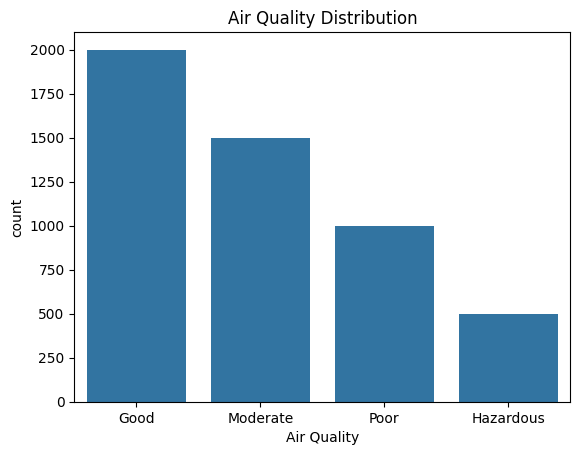

In [86]:
order = ['Good', 'Moderate', 'Poor', 'Hazardous']
sns.countplot(data=df, x='Air Quality', order=order)
plt.title('Air Quality Distribution')
plt.show()

The original class distribution revealed a significant imbalance, with the “Good” air quality category having four times more samples than the “Hazardous” category. This imbalance can lead to biased model performance, where the classifier favors majority classes and fails to accurately identify minority ones. To address this issue, we applied SMOTE (Synthetic Minority Oversampling Technique), which generated synthetic examples for the underrepresented classes. This balancing step ensures that the model receives equal representation from each category, improving its ability to learn patterns for all air quality levels, especially those that are less frequent but critical for public health monitoring.

### Step 6: Apply SMOTE (Synthetic Minority Oversampling Technique)

In [87]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

### Step 7: Rerun SVC model using Radial Basis Function (RBF) kernel

In [88]:
# Train basic SVC model using Radial Basis Function (RBF) kernel
svm = SVC(kernel='rbf')
svm.fit(X_resampled, y_resampled)
y_pred = svm.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       409
           1       0.77      0.70      0.74       294
           2       0.62      0.68      0.65       186
           3       0.79      0.76      0.77       111

    accuracy                           0.80      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.80      0.80      0.80      1000



After applying SMOTE to balance the dataset, the Support Vector Classifier (SVC) showed a significant improvement, achieving an overall accuracy of 80%, compared to 76% before SMOTE. Performance across all classes became more balanced. Notably, the "Hazardous" category (class 3) improved from an F1-score of 0.45 to 0.77, reflecting better recall and precision on this minority class. The "Poor" class (class 2) also improved from an F1-score of 0.56 to 0.65. While performance on the "Good" and "Moderate" classes remained strong, these gains show that SMOTE helped the model generalize better across underrepresented categories, improving fairness and reliability in classification.

### Step 8: Random Forest Classifier

In [89]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='f1_weighted')
grid_rf.fit(X_resampled, y_resampled)

print("Best RF parameters:", grid_rf.best_params_)
print("RF Score:", grid_rf.score(X_test, y_test))

Best RF parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RF Score: 1.0


The Random Forest model achieved excellent performance, with a perfect accuracy score of 1.0 on the test set. After hyperparameter tuning using GridSearchCV, the best configuration was found to be n_estimators=200, max_depth=None, and min_samples_split=2, allowing the model to fully grow trees without limiting their depth. This result suggests that the model is highly effective at capturing the patterns in the data. However, such a perfect score may also indicate potential overfitting, especially if the test set is small or not well-separated from the training data. Further evaluation using cross-validation or an unseen validation set would be helpful to confirm the model’s generalizability.

### Step 9: TabPFN Classifier

In [90]:
# Important: TabPFN is only compatible with small datasets and no missing values
tabpfn_clf = TabPFNClassifier(device='cuda')  # or 'cpu' if GPU is not available

# Fit the model
tabpfn_clf.fit(X_resampled.values, y_resampled.values)

# Predict and evaluate
y_pred_tabpfn = tabpfn_clf.predict(X_test.values)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tabpfn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.99      0.99      0.99       294
           2       0.99      0.99      0.99       186
           3       1.00      1.00      1.00       111

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



The TabPFN model delivered near-perfect classification results, achieving an accuracy of 1.00 along with precision, recall, and F1-scores of 0.99 or 1.00 across all classes. This includes excellent performance on the minority “Hazardous” category (class 3), which had previously shown low recall in earlier models. These results suggest that TabPFN effectively captured complex patterns in the data, even with class imbalance addressed via SMOTE. However, similar to the Random Forest results, such high performance should be interpreted with caution, as it may indicate potential overfitting or lack of variability in the test data. Further validation using external datasets or cross-validation would help confirm the model’s robustness.